**Credit Card Fraud Detection using CNN (Advance Data Science)**

*CNN are used for Image Data Analysis. Howerver, we wanted to go an extra mile and explore how CNN works for our Data Set*

*The term refers to a class of neural networks with a specific network architecture, where each so-called hidden layer typically has two distinct layers: the first stage is the result of a local convolution of the previous layer
he second stage is a max-pooling stage, where the number of units is significantly reduced by keeping only the maximum response of several units of the first stage.*

<img src="images/CNN.png" alt="Credit Card" width="500" height="600">

**The necessary python libraries are imported here-**

*Tensorflow is used to build the neural network.numpy is used to perform basic array operations pandas for loading and manipulating the data.pyplot from  matplotlib is used to visualize the results.train_test_split is used to split the data into training and testing datasets. StandardScaler is used to scale the values in the data.*






**Import Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2.3.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Reading the CSV file
data = pd.read_csv('/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**The dataset has 284807 rows and 31 columns**

In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Lets check how the data looks like..............


In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

To balance the data we will select 492 transactions randomly from non_fraud.Now you can see that non_fraud has 492 rows.


Note: Here we are downSampling our Data so that Imbalance is Removed

In [9]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [10]:
data = fraud.append(non_fraud, ignore_index=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

**X will contain the feature space and y will contain the class label.**

In [12]:
X = data.drop('Class', axis = 1)
y = data['Class']

**Split the data into training and testing set**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [14]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

Standardizing the Dataset

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape

(787, 30)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [17]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

**Build CNN**


*ReLu activation function. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.*

Flatten() is used to convert the data into a 1-dimensional array for inputting it to the next layer.

In [20]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 15ms/step - loss: 0.9087 - accuracy: 0.5972 - val_loss: 0.6319 - val_accuracy: 0.8477
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5230 - accuracy: 0.8056 - val_loss: 0.5804 - val_accuracy: 0.8934
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.4431 - accuracy: 0.8310 - val_loss: 0.5392 - val_accuracy: 0.9137
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3549 - accuracy: 0.8653 - val_loss: 0.5000 - val_accuracy: 0.9188
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3254 - accuracy: 0.8869 - val_loss: 0.4629 - val_accuracy: 0.9239
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3223 - accuracy: 0.8882 - val_loss: 0.4254 - val_accuracy: 0.9239
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3087 - accuracy: 0.8983 - val_loss: 0.3922 - val_accuracy: 0.9188
Epoch 8/20
25/25 [=

**Now we will visualize the results.**

In [26]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

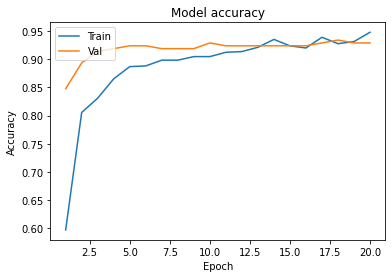

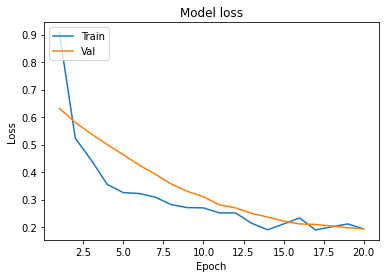

In [27]:
plot_learningCurve(history, epochs)

we can see the Model is Overfiiting 

Tranining Accuracy is high

Test Accuracy is low

Now, lets increase the epoch Size


In [28]:
epochs = 200
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 14ms/step - loss: 0.7061 - accuracy: 0.6760 - val_loss: 0.5888 - val_accuracy: 0.8629
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.4764 - accuracy: 0.8221 - val_loss: 0.5371 - val_accuracy: 0.8528
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.3440 - accuracy: 0.8729 - val_loss: 0.5025 - val_accuracy: 0.8934
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.3641 - accuracy: 0.8704 - val_loss: 0.4750 - val_accuracy: 0.8985
Epoch 5/200
25/25 [==============================] - 0s 9ms/step - loss: 0.3128 - accuracy: 0.8869 - val_loss: 0.4412 - val_accuracy: 0.9036
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.3118 - accuracy: 0.8996 - val_loss: 0.4124 - val_accuracy: 0.9036
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.2827 - accuracy: 0.8983 - val_loss: 0.3730 - val_accuracy: 0.9036
Epoch 8/200


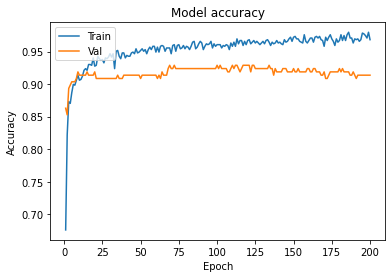

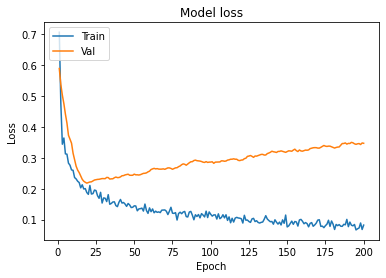

In [29]:
plot_learningCurve(history, epochs)

We are still facing Overfiiting problem. Now, lets add  MaxPool and increase the epoch. Further, we are also increasing the number of layers.

In [32]:
epochs = 75
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/75
25/25 [==============================] - 0s 15ms/step - loss: 0.9073 - accuracy: 0.5947 - val_loss: 0.6573 - val_accuracy: 0.7919
Epoch 2/75
25/25 [==============================] - 0s 8ms/step - loss: 0.8626 - accuracy: 0.6404 - val_loss: 0.6411 - val_accuracy: 0.7107
Epoch 3/75
25/25 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.6925 - val_loss: 0.6229 - val_accuracy: 0.6751
Epoch 4/75
25/25 [==============================] - 0s 8ms/step - loss: 0.6332 - accuracy: 0.7090 - val_loss: 0.6022 - val_accuracy: 0.6751
Epoch 5/75
25/25 [==============================] - 0s 8ms/step - loss: 0.6264 - accuracy: 0.7370 - val_loss: 0.5787 - val_accuracy: 0.6904
Epoch 6/75
25/25 [==============================] - 0s 8ms/step - loss: 0.5347 - accuracy: 0.7586 - val_loss: 0.5571 - val_accuracy: 0.6904
Epoch 7/75
25/25 [==============================] - 0s 8ms/step - loss: 0.4834 - accuracy: 0.7840 - val_loss: 0.5323 - val_accuracy: 0.6954
Epoch 8/75
25/25 [=

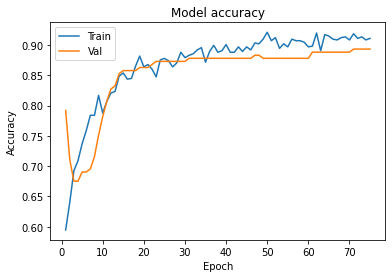

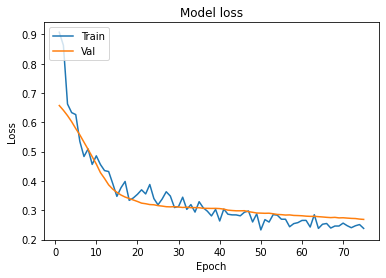

In [33]:
plot_learningCurve(history, epochs)

**Conclusion:**

 Hence, we have achieved better results as the entire overfiiting is removed by Hyperparameter tuning.